<a href="https://colab.research.google.com/github/AkshataJv/FIFA-World-Cup-2022-Winner-Prediction/blob/main/FIFA_World_Cup_2022_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('international_matches.csv')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [124]:
df.shape

(23921, 25)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [126]:
df['date'] = pd.to_datetime(df['date'])
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [127]:
fifa_rank = df[['date','home_team','away_team','home_team_continent','away_team_continent','home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points','home_team_result','home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']]

home = fifa_rank[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns={'home_team':'team','home_team_fifa_rank':'rank','home_team_total_fifa_points':'rank_points'})

away = fifa_rank[['date','away_team','away_team_fifa_rank', 'away_team_total_fifa_points']].rename(columns={'away_team':'team','away_team_fifa_rank':'rank','away_team_total_fifa_points':'rank_points'})

fifa_rank = pd.concat([home, away])

fifa_rank = fifa_rank.sort_values(['team','date'], ascending=[True, False])

fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount() + 1

fifa_rank_top = fifa_rank[fifa_rank['row_number'] == 1].drop('row_number', axis=1).nsmallest(10, 'rank')

fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [128]:
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'columns contains\'null\' values : \n\n {columns_contains_null}')

columns contains'null' values : 

 ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


In [129]:
wc_2022 = ['Qatar', 'Ecuador', 'Sengal', 'Netherlands', 'IR Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arebia', 'Mexico','Poland', 'France', 'Austrelia', 'Saudi Arebia', 'Denmark']

In [130]:
for x in wc_2022:
  for y in columns_contains_null:
    df.loc[df['home_team'] == x, y]

In [131]:
# Is there any home advantage
home_team = df[['country','home_team_score','away_team_score']]
home_team.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [132]:
home_team[home_team['home_team_score'] > home_team['away_team_score']]
home_wins = home_team[home_team['home_team_score'] > home_team['away_team_score']]
home_wins

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23908,Netherlands,3,2
23912,Bosnia and Herzegovina,3,2
23915,Turkey,2,0
23916,Moldova,2,1


In [133]:
home_team[home_team['home_team_score'] < home_team['away_team_score']]
home_losses = home_team[home_team['home_team_score'] < home_team['away_team_score']]
home_losses

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


In [134]:
home_ad = home_wins[['country','home_team_score','away_team_score']].rename(columns = {'home_team_score':'wins','away_team_score':'losses'})
away_ad = home_losses[['country','home_team_score','away_team_score']].rename(columns = {'home_team_score':'wins','away_team_score':'losses'})

home_advantage = pd.concat([home_ad, away_ad])
home_advantage

,country,wins,losses
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


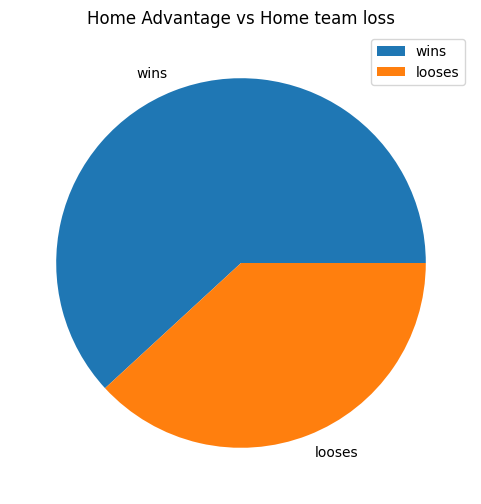

In [135]:
home_advantage[['wins', 'losses']].mean().plot(kind = 'pie', title ='Home Advantage vs Home team loss', labels = ['wins','looses'], figsize = (6,6))
plt.legend();

In [136]:
# Which team has the Wins

home_team = df[['date','home_team','home_team_score','away_team_score']]
home_team.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [137]:
# Which team has the Wins

home_team = df[['date','home_team','home_team_score','away_team_score']]
home_team.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [138]:
home_team['home_team_score']>home_team['away_team_score']
home_wins = home_team[home_team['home_team_score'] > home_team['away_team_score']]
home_wins

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
...,...,...,...,...
23908,2022-06-14,Netherlands,3,2
23912,2022-06-14,Bosnia and Herzegovina,3,2
23915,2022-06-14,Turkey,2,0
23916,2022-06-14,Moldova,2,1


In [139]:
home_team[home_team['home_team_score'] < home_team['away_team_score']]
home_losses = home_team[home_team['home_team_score'] < home_team['away_team_score']]

home_losses.head()

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [140]:
home_team_wins = home_wins[['date', 'home_team','home_team_score','away_team_score']].rename(columns = {'date':'date', 'home_team':'team', 'home_team_score':'Home_team_wins','away_team_score':'away_team_wins'})
away_team_ad = home_losses[['date','home_team','home_team_score','away_team_score']].rename(columns = {'date':'date', 'home_team':'team','home_team_score':'wins','away_team_score':'away_team_wins'})

Team_streak = pd.concat([home_team_wins, away_team_ad])
Team_streak

,date,team,Home_team_wins,away_team_wins,wins
0,1993-08-08,Bolivia,3.0,1,NaN
2,1993-08-08,Ecuador,5.0,0,NaN
3,1993-08-08,Guinea,1.0,0,NaN
6,1993-08-08,Zimbabwe,2.0,0,NaN
7,1993-08-09,Guinea,4.0,0,NaN
...,...,...,...,...,...
23909,2022-06-14,Poland,NaN,1,0.0
23910,2022-06-14,Armenia,NaN,4,1.0
23913,2022-06-14,Romania,NaN,3,0.0
23917,2022-06-14,Liechtenstein,NaN,2,0.0


In [141]:
Team_streak['team'].value_counts().nlargest(1)

,count
team,
USA,253


In [142]:
# What is the winning Percentage compared to when the highest-ranked team plays against lowest ranked team

def victory(team1, team2, team1_rank, team2_rank, team1_score, team2_score):
  if team1_score > team2_score:
    winner = team1
  elif team1_score == team2_score:
    winner = 'Drawn'
  else:
    winner = team2
  return winner

In [143]:
df['winner'] = df.apply(lambda x: victory (x['home_team'], x['away_team'], x['home_team_fifa_rank'], x['away_team_fifa_rank'], x['home_team_score'], x['away_team_score']), axis = 1)

In [144]:
def rank(home, away, rank_home, rank_away):
  if rank_home < rank_away:
    return home
  else:
    return away

In [145]:
df['better_rank'] = df.apply(lambda x: rank(x['home_team'], x['away_team'],  x['home_team_fifa_rank'], x['away_team_fifa_rank']), axis = 1)

In [146]:
def result_rank(winner, better_rank):
  if winner == 'Drawn':
    return winner
  if winner == better_rank:
    return 'Higest Rank Win'
  else:
    return 'Smallest'

In [147]:
df['result_rank'] = df.apply(lambda x: result_rank(x['winner'], x['better_rank']), axis = 1)

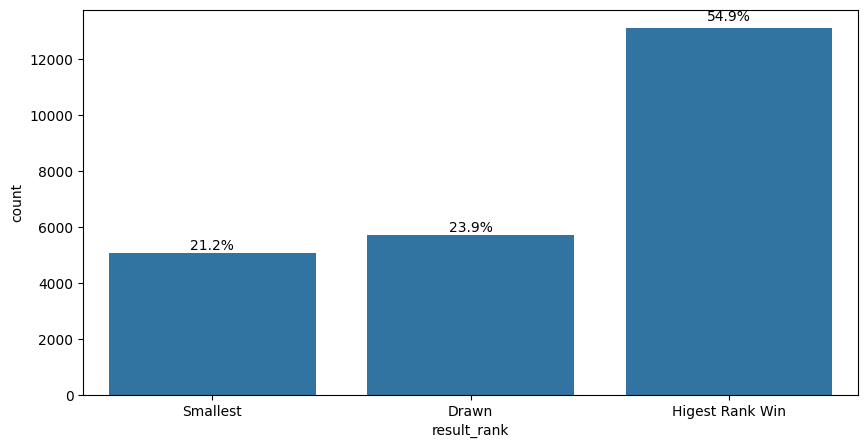

In [148]:
plt.figure(figsize=(10, 5))
total = float(len(df))
ax = sns.countplot(x= 'result_rank', data=df)
for p in ax.patches:
  Percentage = '{:.1f}%'.format(100 * p.get_height()/total)

  width = p.get_width()
  height = p.get_height()
  x_coord, y_coord = p.get_xy()
  ax.annotate(Percentage, (x_coord + width/2, y_coord + height*1.02), ha = 'center')

plt.show()

In [149]:
# What is thw winning percentage comparing when the highest attack rank plays against the lowest attack rank

df_rank_attack = df[df['home_team_mean_offense_score'].notnull()]

In [150]:
df_rank_attack = df[df['away_team_mean_offense_score'].notnull()]

In [151]:
def rank_attack(home, away, rank_home, rank_away):
  if rank_home < rank_away:
    return home
  else:
    return away

In [152]:
df_rank_attack['better_attack'] = df.apply(lambda x: rank_attack(x['home_team'], x['away_team'], x['home_team_mean_offense_score'], x['away_team_mean_offense_score']), axis = 1)

In [153]:
df_rank_attack['result_attack'] = df_rank_attack.apply(lambda x: result_rank(x['winner'], x['better_attack']), axis = 1)

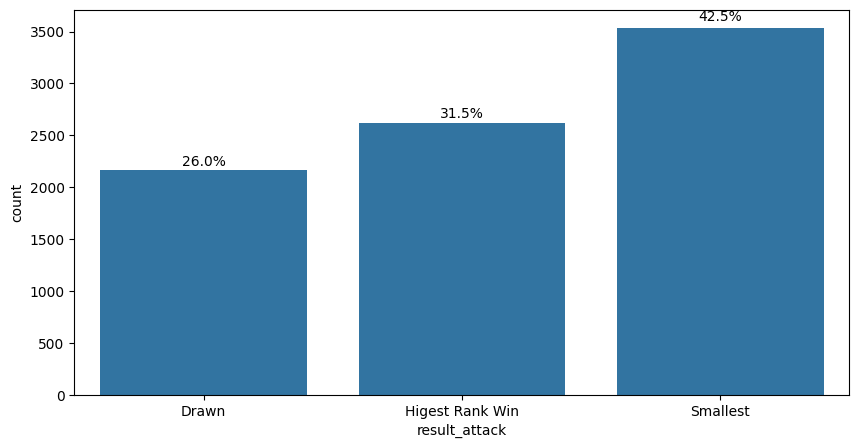

In [154]:
plt.figure(figsize=(10, 5))
total = float(len(df_rank_attack))
ax = sns.countplot(x= 'result_attack', data=df_rank_attack)
for p in ax.patches:
  Percentage = '{:.1f}%'.format(100 * p.get_height()/total)

  width = p.get_width()
  height = p.get_height()
  x_coord, y_coord = p.get_xy()
  ax.annotate(Percentage, (x_coord + width/2, y_coord + height*1.02), ha = 'center')

plt.show()

In [155]:
offence_score = []
for x in wc_2022:
  od_score = np.round((df[df['home_team']== x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2, 2)
  offence_score.append(od_score)

offence_scores = pd.DataFrame({'Team' : wc_2022, 'Offence Score' : offence_score}).sort_values('Offence Score', ascending = False).reset_index(drop = True)
offence_scores.index +=1
offence_scores

,Team,Offence Score
1,Argentina,88.25
2,France,85.70
3,Netherlands,85.47
4,Poland,79.26
5,Mexico,79.21
6,Denmark,77.49
7,USA,76.03
8,Ecuador,75.37
9,Wales,74.35
10,IR Iran,70.98


In [156]:
goals_conceded_home_list = []
goals_scored_home_list = []
goals_conceded_away_list = []
goals_scored_away_list = []
total_goals_scored_list = []
total_goals_conceded_list = []

for team in wc_2022:
    gch = df[df['home_team'] == team]['away_team_score'].sum()
    goals_conceded_home_list.append(gch)

    gsh = df[df['home_team'] == team]['home_team_score'].sum()
    goals_scored_home_list.append(gsh)

    gca = df[df['away_team'] == team]['home_team_score'].sum()
    goals_conceded_away_list.append(gca)

    gsa = df[df['away_team'] == team]['away_team_score'].sum()
    goals_scored_away_list.append(gsa)

    tgc = gch + gca
    tgs = gsh + gsa
    total_goals_conceded_list.append(tgc)
    total_goals_scored_list.append(tgs)

goals = pd.DataFrame({
    'Team': wc_2022,
    'Scored goals home': goals_scored_home_list,
    'Conceded goals home': goals_conceded_home_list,
    'Scored goals away': goals_scored_away_list,
    'Conceded goals away': goals_conceded_away_list,
    'Total scored goals': total_goals_scored_list,
    'Total conceded goals': total_goals_conceded_list
})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1
goals

,Team,Scored goals home,Conceded goals home,Scored goals away,Conceded goals away,Total scored goals,Total conceded goals,Goal difference,Goal ratio
1,IR Iran,425,115,288,165,713,280,433,2.546429
2,Netherlands,426,145,274,142,700,287,413,2.439024
3,France,447,154,223,112,670,266,404,2.518797
4,Mexico,572,272,286,247,858,519,339,1.653179
5,Argentina,379,140,278,192,657,332,325,1.978916
6,USA,589,261,172,191,761,452,309,1.683628
7,Denmark,278,135,226,163,504,298,206,1.691275
8,Qatar,422,234,176,214,598,448,150,1.334821
9,Poland,306,169,234,223,540,392,148,1.377551
10,Ecuador,257,130,180,284,437,414,23,1.055556


In [157]:
offence_players_vs_goals_scored = offence_scores.merge(goals,on="Team")

offence_players_vs_goals_scored = offence_players_vs_goals_scored[['Team', 'Offence Score', 'Total scored goals']]

offence_players_vs_goals_scored['Total scored goals/Offence Score'] = offence_players_vs_goals_scored['Total scored goals'] / offence_players_vs_goals_scored['Offence Score']

offence_players_vs_goals_scored = offence_players_vs_goals_scored.sort_values('Total scored goals/Offence Score', ascending=False).reset_index(drop=True)
offence_players_vs_goals_scored.index += 1

offence_players_vs_goals_scored

,Team,Offence Score,Total scored goals,Total scored goals/Offence Score
1,Mexico,79.21,858,10.831966
2,IR Iran,70.98,713,10.045083
3,USA,76.03,761,10.009207
4,Netherlands,85.47,700,8.190008
5,France,85.70,670,7.817970
6,Argentina,88.25,657,7.444759
7,Poland,79.26,540,6.813020
8,Denmark,77.49,504,6.504065
9,Ecuador,75.37,437,5.798063
10,Wales,74.35,273,3.671822


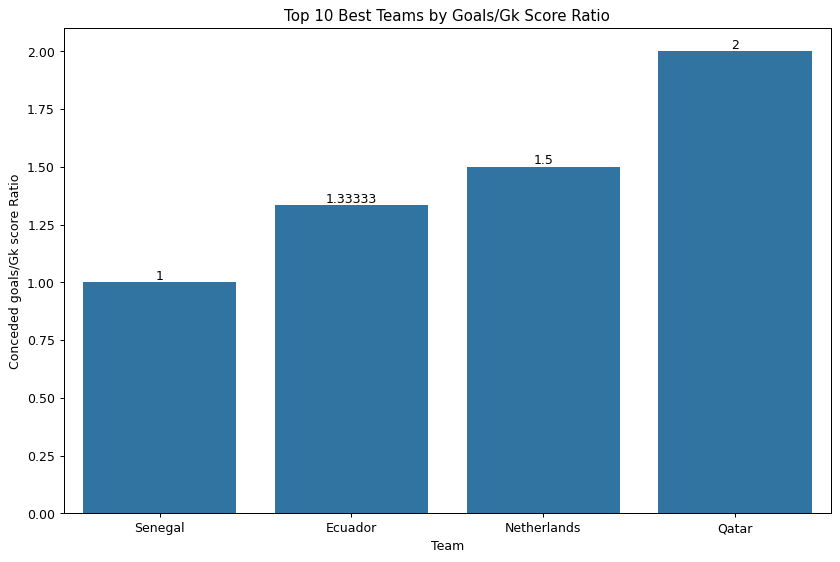

In [158]:
goalkeeper_scores = pd.DataFrame({
    'Team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
    'Gk score': [5, 6, 7, 6]
})

goals = pd.DataFrame({
    'Team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
    'Total conceded goals': [10, 8, 7, 9]
})

import matplotlib.pyplot as plt
import seaborn as sns

goalkeeper_vs_goals_conceded = goalkeeper_scores.merge(goals, on='Team')
goalkeeper_vs_goals_conceded['Conceded goals/Gk score Ratio'] = goalkeeper_vs_goals_conceded['Total conceded goals'] / goalkeeper_vs_goals_conceded['Gk score']

top_teams = goalkeeper_vs_goals_conceded.sort_values('Conceded goals/Gk score Ratio').head(10)

plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=top_teams, x='Team', y='Conceded goals/Gk score Ratio')
ax.bar_label(ax.containers[0])

plt.xlabel('Team')
plt.ylabel('Conceded goals/Gk score Ratio')
plt.title('Top 10 Best Teams by Goals/Gk Score Ratio')
plt.show()


In [159]:
#Top 10 team with the Longest win streak
import numpy as np
import pandas as pd

df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia',
           'Mexico', 'Poland', 'France', 'Australia', 'Denmark']

dframes = {}

for team in wc_2022:
    df1 = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()

    df1['winns'] = np.where(((df1['home_team'] == team) & (df1['home_team_result'] == 'Win')) |((df1['away_team'] == team) & (df1['home_team_result'] == 'Lose')),1, 0)

    name = team + '_streak'
    dframes[name] = df1

streaks = []

for frame_name in dframes.keys():
    df_frame = dframes[frame_name]

    df_frame['start_of_streak'] = df_frame['winns'].ne(df_frame['winns'].shift())

    df_frame['streaks_id'] = df_frame['start_of_streak'].cumsum()

    df_frame['streak_counter'] = df_frame.groupby('streaks_id').cumcount() + 1

    max_streak = df_frame[df_frame['winns'] == 1]['streak_counter'].max()

    streaks.append(max_streak if pd.notna(max_streak) else 0)

Streaks = pd.DataFrame({'Team': wc_2022, 'Streak': streaks})
Streaks = Streaks.sort_values('Streak', ascending=False).reset_index(drop=True)

Streaks.index += 1

print(Streaks)

            Team  Streak
1         France      14
2      Australia      13
3            USA      11
4   Saudi Arabia      11
5    Netherlands      10
6        Senegal      10
7         Mexico      10
8      Argentina       9
9          Qatar       7
10        Poland       7
11       Denmark       6
12       Ecuador       6
13         Wales       4
14          Iran       0


In [160]:
#Top 10 team with the Longest win streak
goalkeeper_scores_list = []

for team in wc_2022:
    home_gk_score = df[df['home_team'] == team]['home_team_goalkeeper_score'].mean()
    away_gk_score = df[df['away_team'] == team]['away_team_goalkeeper_score'].mean()

    if pd.isna(home_gk_score) and pd.isna(away_gk_score):
        avg_gk_score = np.nan
    elif pd.isna(home_gk_score):
        avg_gk_score = away_gk_score
    elif pd.isna(away_gk_score):
        avg_gk_score = home_gk_score
    else:
        avg_gk_score = (home_gk_score + away_gk_score) / 2

    goalkeeper_scores_list.append(np.round(avg_gk_score, 2))

goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Gk score': goalkeeper_scores_list})
goalkeeper_scores = goalkeeper_scores.sort_values('Gk score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1
goalkeeper_scores

,Team,Gk score
1,France,86.86
2,Netherlands,83.23
3,Poland,82.10
4,USA,81.12
5,Argentina,80.70
6,Denmark,79.66
7,Mexico,79.18
8,Australia,78.36
9,Wales,73.80
10,Senegal,72.38


In [161]:
df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

home_matches = df[['date', 'home_team', 'home_team_result']].rename(columns={'home_team': 'team', 'home_team_result': 'result'})
away_matches = df[['date', 'away_team']].rename(columns={'away_team': 'team'})

away_matches['result'] = df['home_team_result'].apply(lambda x: 'Lose' if x == 'Win' else ('Win' if x == 'Lose' else 'Draw'))

all_matches = pd.concat([home_matches, away_matches])

all_matches = all_matches.sort_values(by=['team', 'date'], ascending=[True, True])

print("Created home_matches, away_matches, and all_matches DataFrames, and sorted all_matches.")

Created home_matches, away_matches, and all_matches DataFrames, and sorted all_matches.


In [162]:
all_matches['current_streak'] = 0
all_matches['max_streak'] = 0

def calculate_streaks(group):
    current_streak = 0
    max_streak = 0
    streaks = []
    max_streaks_list = []

    for result in group['result']:
        if result == 'Win':
            current_streak += 1
        else:
            current_streak = 0
        max_streak = max(max_streak, current_streak)
        streaks.append(current_streak)
        max_streaks_list.append(max_streak)
    group['current_streak'] = streaks
    group['max_streak'] = max_streaks_list
    return group

all_matches = all_matches.groupby('team').apply(calculate_streaks)

print("Calculated current and maximum win streaks for each team.")

Calculated current and maximum win streaks for each team.


In [163]:
df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia',
           'Mexico', 'Poland', 'France', 'Australia', 'Denmark']

dframes = {}

for team in wc_2022:
    df1 = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()

    df1['winns'] = np.where(
        ((df1['home_team'] == team) & (df1['home_team_result'] == 'Win')) |
        ((df1['away_team'] == team) & (df1['home_team_result'] == 'Lose')), 1, 0
    )

    name = team + '_streak'
    dframes[name] = df1

streaks = []

for frame in dframes.keys():
    dframes[frame]['start_of_streak'] = dframes[frame]['winns'].ne(dframes[frame]['winns'].shift())
    dframes[frame]['streaks_id'] = dframes[frame]['start_of_streak'].cumsum()
    dframes[frame]['streak_counter'] = dframes[frame].groupby('streaks_id').cumcount() + 1

    streak = dframes[frame][dframes[frame]['winns'] == 1]['streak_counter'].max()
    streaks.append(streak)

Streaks = pd.DataFrame({'Team': wc_2022, 'Streak': streaks}).sort_values('Streak', ascending=False).reset_index(drop=True)
Streaks.index += 1
print(Streaks)


            Team  Streak
1         France    14.0
2      Australia    13.0
3   Saudi Arabia    11.0
4            USA    11.0
5    Netherlands    10.0
6        Senegal    10.0
7         Mexico    10.0
8      Argentina     9.0
9          Qatar     7.0
10        Poland     7.0
11       Ecuador     6.0
12       Denmark     6.0
13         Wales     4.0
14          Iran     NaN


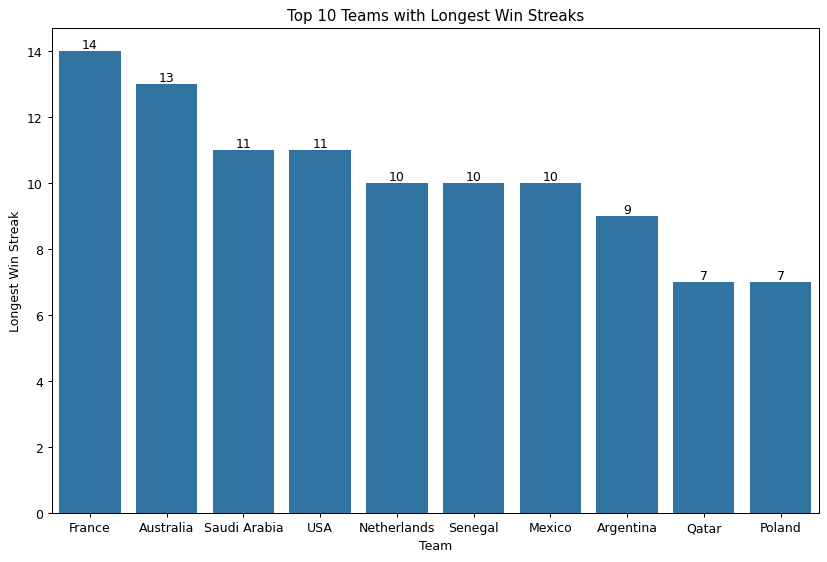

In [164]:
plt.figure(figsize=(11,7), dpi = 90)
ax = sns.barplot(data = Streaks[:10], x = 'Team', y = 'Streak')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Longest Win Streak')
plt.title('Top 10 Teams with Longest Win Streaks')
plt.show()

In [165]:
# Better team win Percentage in the home team, away team

away_team_better_rank = df[(df['home_team_fifa_rank']> df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

,count
home_team_result,
Lose,4984
Win,3429
Draw,2840


In [166]:
away_team_better_rank = pd.Series({'wins': 30, 'total': 50})
home_team_better_rank = pd.Series({'wins': 40, 'total': 60})

away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank['wins'] / away_team_better_rank['total'], 2)
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank['wins'] / home_team_better_rank['total'], 2)

total_wins = away_team_better_rank['wins'] + home_team_better_rank['wins']
total_games = away_team_better_rank['total'] + home_team_better_rank['total']
total_team_better_rank_wins_percent = np.round(100 * total_wins / total_games, 2)

data = {'win_percent': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_wins_percent]}

better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])

print(better_team_win_percent)

       win_percent
home         66.67
away         60.00
total        63.64


Text(0.5, 1.0, 'Better Team Win Percent')

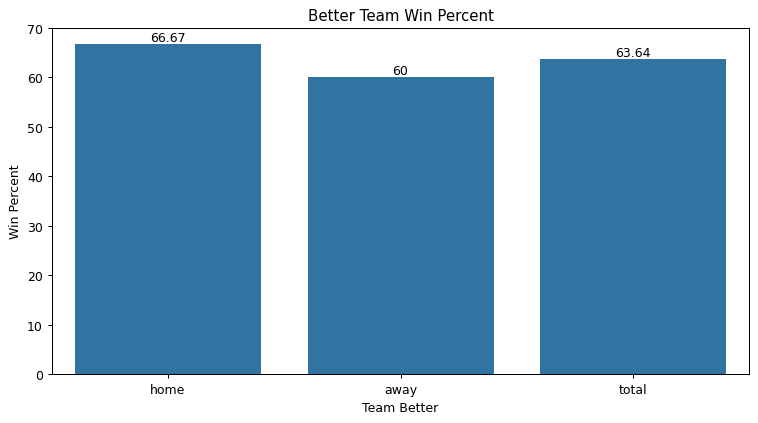

In [167]:
plt.figure(figsize=(10,5), dpi = 90)
ax = sns.barplot(data = better_team_win_percent, x=better_team_win_percent.index, y = "win_percent")
ax.bar_label(ax.containers[0])
plt.xlabel('Team Better')
plt.ylabel('Win Percent')
plt.title('Better Team Win Percent')

In [168]:
# Best defence, win, offense and gk

ranks = []
for team in wc_2022:

    rank_df = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()
    rank_df = rank_df.sort_values(['date', 'home_team_fifa_rank'])

    team_ranks = []
    for _, row in rank_df.iterrows():
        if row['home_team'] == team:
            team_rank = row['home_team_fifa_rank']
        else:
            team_rank = row['away_team_fifa_rank']
        team_ranks.append(team_rank)

    avg_rank = sum(team_ranks) / len(team_ranks) if team_ranks else None
    ranks.append(avg_rank)

team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks})
team_ranks = team_ranks.sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1

print(team_ranks)


            Team       Rank
1      Argentina   6.318801
2         France   8.240541
3    Netherlands   9.926471
4         Mexico  14.504836
5        Denmark  19.029032
6            USA  20.096983
7         Poland  35.315029
8        Ecuador  42.955224
9      Australia  48.068404
10       Senegal  49.070769
11  Saudi Arabia  52.802548
12         Wales  53.878661
13         Qatar  82.506173
14          Iran        NaN


In [169]:
df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia',
           'Mexico', 'Poland', 'France', 'Australia', 'Denmark']

goalkeeper_scores_list = []

for team in wc_2022:
    home_gk_score = df[df['home_team'] == team]['home_team_goalkeeper_score'].mean()
    away_gk_score = df[df['away_team'] == team]['away_team_goalkeeper_score'].mean()

    if pd.isna(home_gk_score) and pd.isna(away_gk_score):
        avg_gk_score = np.nan
    elif pd.isna(home_gk_score):
        avg_gk_score = away_gk_score
    elif pd.isna(away_gk_score):
        avg_gk_score = home_gk_score
    else:
        avg_gk_score = (home_gk_score + away_gk_score) / 2

    goalkeeper_scores_list.append(np.round(avg_gk_score, 2) if pd.notna(avg_gk_score) else np.nan)

goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Gk Score': goalkeeper_scores_list})
goalkeeper_scores = goalkeeper_scores.sort_values('Gk Score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1
goalkeeper_scores

,Team,Gk Score
1,France,86.86
2,Netherlands,83.23
3,Poland,82.10
4,USA,81.12
5,Argentina,80.70
6,Denmark,79.66
7,Mexico,79.18
8,Australia,78.36
9,Wales,73.80
10,Senegal,72.38


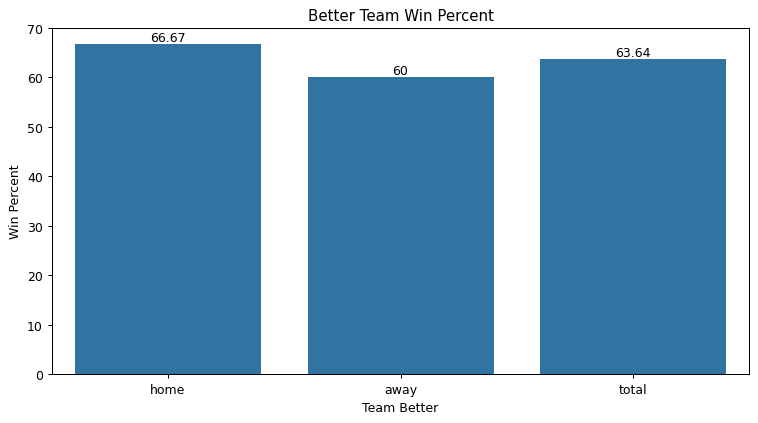

In [170]:
plt.figure(figsize=(10,5), dpi = 90)
ax = sns.barplot(data = better_team_win_percent, x=better_team_win_percent.index, y = "win_percent")
ax.bar_label(ax.containers[0])
plt.xlabel('Team Better')
plt.ylabel('Win Percent')
plt.title('Better Team Win Percent')
plt.show()

Text(0.5, 1.0, 'Top goalkeeper score')

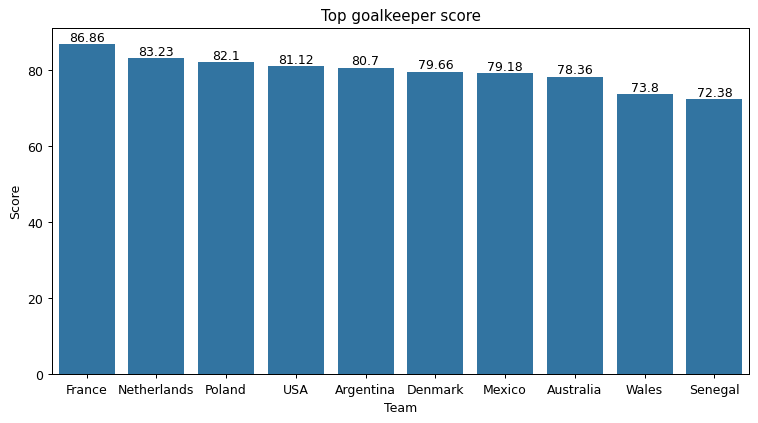

In [173]:
plt.figure(figsize=(10,5), dpi = 90)
ax = sns.barplot(data = goalkeeper_scores[:10], x='Team', y = 'Gk Score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top goalkeeper score')

In [174]:
df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia',
           'Mexico', 'Poland', 'France', 'Australia', 'Denmark']

defence_score = []

for x in wc_2022:
    home_defense_avg = df[df["home_team"] == x]["home_team_mean_defense_score"].mean()
    away_defense_avg = df[df["away_team"] == x]["away_team_mean_defense_score"].mean()

    if pd.isna(home_defense_avg) and pd.isna(away_defense_avg):
        avg_defense_score = np.nan
    elif pd.isna(home_defense_avg):
        avg_defense_score = away_defense_avg
    elif pd.isna(away_defense_avg):
        avg_defense_score = home_defense_avg
    else:
        avg_defense_score = (home_defense_avg + away_defense_avg) / 2

    defence_score.append(np.round(avg_defense_score, 2) if pd.notna(avg_defense_score) else np.nan)

defence_scores = pd.DataFrame({'Team': wc_2022, 'Df score': defence_score})

defence_scores = defence_scores.sort_values('Df score', ascending=True).reset_index(drop=True)

defence_scores.index += 1

print(defence_scores)

            Team  Df score
1        Ecuador     70.73
2   Saudi Arabia     71.34
3      Australia     72.60
4          Wales     74.68
5            USA     74.97
6         Poland     75.81
7         Mexico     76.96
8        Senegal     77.54
9        Denmark     78.65
10   Netherlands     80.73
11     Argentina     83.00
12        France     84.09
13         Qatar       NaN
14          Iran       NaN


Text(0.5, 1.0, 'Top 10 Strongest Defence')

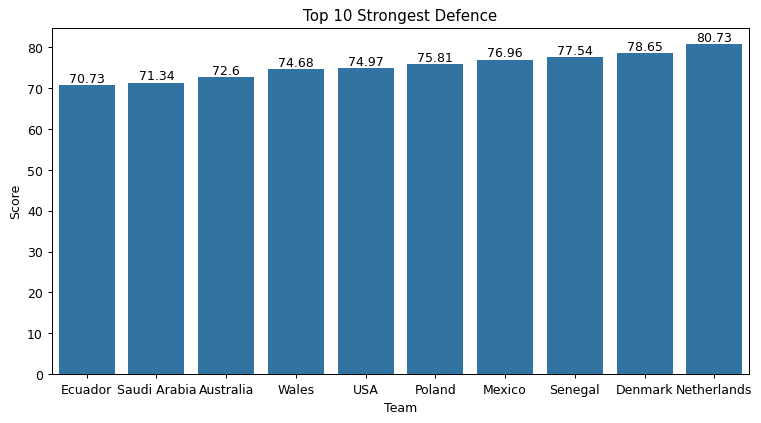

In [175]:
plt.figure(figsize=(10,5), dpi = 90)
ax = sns.barplot(data = defence_scores[:10], x='Team', y = 'Df score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Defence')

In [176]:
# Mid field stren
midfield_score = []
for x in wc_2022:
    md_score = round((df[df['home_team'] == x]['home_team_mean_offense_score'].mean() +df[df['away_team'] == x]['away_team_mean_offense_score'].mean()) / 2, 2)
    midfield_score.append(of_score)

midfield_score = pd.DataFrame({'team': wc_2022,'Md score': midfield_score}).sort_values('Md score', ascending=False)

midfield_score.index = range(len(attack))
midfield_score

,team,Md score
0,Qatar,77.49
1,Ecuador,77.49
2,Senegal,77.49
3,Netherlands,77.49
4,Iran,77.49
5,USA,77.49
6,Wales,77.49
7,Argentina,77.49
8,Saudi Arabia,77.49
9,Mexico,77.49


Text(0.5, 1.0, 'Top 10 Strongest Midfield')

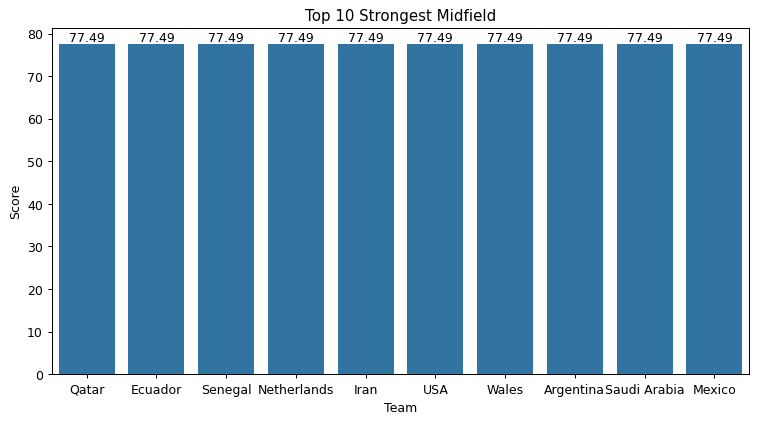

In [177]:
plt.figure(figsize=(10,5), dpi = 90)
ax = sns.barplot(data=midfield_score[:10], x='team', y = 'Md score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Midfield')

In [178]:
# Win percentage calculation

hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc_2022:
    home_win = df[df['home_team'] == team][df['home_team_result'] == 'Win'].shape[0]
    home_draw = df[df['home_team'] == team][df['home_team_result'] == 'Draw'].shape[0]  # Fixed: shape[0] not shape[8]
    home_lose = df[df['home_team'] == team][df['home_team_result'] == 'Lose'].shape[0]  # Fixed: 'home_team' quotes

    # Away results (reversed logic - when home team loses, away team wins)
    away_win = df[df['away_team'] == team][df['home_team_result'] == 'Lose'].shape[0]  # Fixed: missing =
    away_draw = df[df['away_team'] == team][df['home_team_result'] == 'Draw'].shape[0]
    away_lose = df[df['away_team'] == team][df['home_team_result'] == 'Win'].shape[0]  # Fixed: missing =

    # Append to lists
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)

    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

# Calculate totals
wins = np.add(hwins, awins)  # Fixed: missing =
draws = np.add(hdraws, adraws)  # Fixed: missing =
loses = np.add(hloses, aloses)  # Fixed: missing =

In [179]:
df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia',
           'Mexico', 'Poland', 'France', 'Australia', 'Denmark']
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc_2022:
    home_win = df[df['home_team'] == team][df['home_team_result'] == 'Win'].shape[0]
    home_draw = df[df['home_team'] == team][df['home_team_result'] == 'Draw'].shape[0]
    home_lose = df[df['home_team'] == team][df['home_team_result'] == 'Lose'].shape[0]

    away_win = df[df['away_team'] == team][df['home_team_result'] == 'Lose'].shape[0]
    away_draw = df[df['away_team'] == team][df['home_team_result'] == 'Draw'].shape[0]
    away_lose = df[df['away_team'] == team][df['home_team_result'] == 'Win'].shape[0]

    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)

    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

wins = np.add(hwins, awins)
draws = np.add(hdraws, adraws)
loses = np.add(hloses, aloses)

win_draw_lose = pd.DataFrame({
    'Team': wc_2022,
    'Win': wins,
    'Draw': draws,
    'Lose': loses,
    'Home win': hwins,
    'Home draw': hdraws,
    'Home lose': hloses,
    'Away win': awins,
    'Away draw': adraws,
    'Away lose': aloses
})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win'] + win_draw_lose['Draw'] + win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win'] + win_draw_lose['Home draw'] + win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win'] + win_draw_lose['Away draw'] + win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.round(100 * win_draw_lose['Win'] / win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100 * win_draw_lose['Draw'] / win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100 * win_draw_lose['Lose'] / win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100 * win_draw_lose['Home win'] / win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100 * win_draw_lose['Home draw'] / win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100 * win_draw_lose['Home lose'] / win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100 * win_draw_lose['Away win'] / win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100 * win_draw_lose['Away draw'] / win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100 * win_draw_lose['Away lose'] / win_draw_lose['Total Away'], 2)

win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1

win_draw_lose.style.set_properties(subset=['Home win'], **{'background-color': 'green', 'color': 'white'}).background_gradient(subset=['Win %'], cmap='RdYlGn')

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
2,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
3,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
4,Australia,307,162,63,82,112,26,31,169,50,37,51,138,52.770000,20.520000,26.710000,66.270000,15.380000,18.340000,36.230000,26.810000,36.960000
5,Mexico,517,272,106,139,190,66,60,316,82,40,79,201,52.610000,20.500000,26.890000,60.130000,20.890000,18.990000,40.800000,19.900000,39.300000
6,USA,464,242,91,131,194,56,64,314,48,35,67,150,52.160000,19.610000,28.230000,61.780000,17.830000,20.380000,32.000000,23.330000,44.670000
7,Denmark,310,158,73,79,90,37,33,160,68,36,46,150,50.970000,23.550000,25.480000,56.250000,23.120000,20.620000,45.330000,24.000000,30.670000
8,Saudi Arabia,471,238,103,130,164,53,55,272,74,50,75,199,50.530000,21.870000,27.600000,60.290000,19.490000,20.220000,37.190000,25.130000,37.690000
9,Senegal,325,156,89,80,98,35,17,150,58,54,63,175,48.000000,27.380000,24.620000,65.330000,23.330000,11.330000,33.140000,30.860000,36.000000
10,Poland,346,158,86,102,91,43,47,181,67,43,55,165,45.660000,24.860000,29.480000,50.280000,23.760000,25.970000,40.610000,26.060000,33.330000


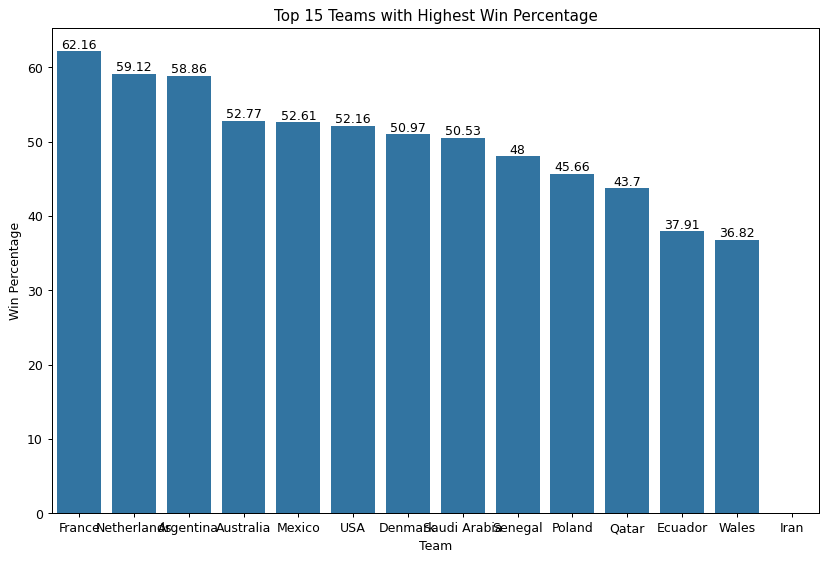

In [180]:
plt.figure(figsize=(11,7), dpi=90)

ax = sns.barplot(data= win_draw_lose[:15], x='Team', y = 'Win %')

ax.bar_label(ax.containers[0])

plt.xlabel('Team')

plt.ylabel('Win Percentage')

plt.title('Top 15 Teams with Highest Win Percentage')
plt.show()